Algoritmos


In [30]:
def insertion_sort(items: list[int]):
    len_items = len(items)
    for i in range(1, len_items):
        j = i
        while j > 0 and items[j] < items[j - 1]:
            items[j], items[j - 1] = items[j - 1], items[j]
            j -= 1


def median_quick(A):
    return len(A) // 2


def median_brute(A):
    insertion_sort(A)
    median_index = len(A) // 2
    return A[median_index]

In [31]:
A = [8, 9, 5, 2, 11, 7, 1]

brute_arr = A.copy()

print("-> Before brutal", brute_arr)
brute_index = median_brute(brute_arr)
print("-> After brutal", brute_arr)
print("-> Brutal index =", brute_index)

quick_arr = A.copy()
print("-> Before quick", quick_arr)
quick_index = median_quick(quick_arr)
print("-> After quick", quick_arr)
print("-> Quick index", quick_index)

-> Before brutal [8, 9, 5, 2, 11, 7, 1]
-> After brutal [1, 2, 5, 7, 8, 9, 11]
-> Brutal index = 7
-> Before quick [8, 9, 5, 2, 11, 7, 1]
-> After quick [8, 9, 5, 2, 11, 7, 1]
-> Quick index 3


Coleta dados


In [35]:
import time
from numpy import random


# scope of the randomness
DOMAIN = 9999999

# defines the number of times each algorithm will be processed to find the average time
num_rounds = 50

alg_results = dict()


# calculates the executions average time
def avgTime(func, size, debug=False):
    t = 0
    for i in range(num_rounds):
        random.seed(size + i)
        # create a list with random numbers
        dataList = list(random.randint(DOMAIN, size=size))

        start = time.time()
        m = func(dataList)
        end = time.time()
        t += end - start

        if debug:
            correct_median = sorted(dataList)[len(dataList) // 2]
            if m != correct_median:
                print(
                    f"size={size}, seed={size+i}, m={m} e correct median={correct_median}"
                )
            assert m == correct_median

    return t / num_rounds


# defines the algorithms to be processed
algorithms = [median_brute, median_quick]

# sizes
sizes = [i for i in range(500, 2501, 500)]
mapSizeToTime = dict()
for i in range(len(sizes)):
    print(f"Starting collect {i+1}")

    # map list size to algorithm average time
    for algorithm in algorithms:
        print("  > ", algorithm.__name__)
        mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(
            algorithm, sizes[i], True
        )
    print("")

print("Finish data collection")

Starting collect 1
  >  median_brute
  >  median_quick
size=500, seed=500, m=250 e correct median=5366212


AssertionError: 

Formata dados


In [33]:
import pandas as pd

df = pd.DataFrame.from_dict(mapSizeToTime, orient="index", columns=["Time"])
df["Algorithm"] = [i.split("##")[0] for i in df.index]
df["Size"] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
median_brute##500,0.006381,median_brute,500
median_brute##1000,0.027381,median_brute,1000
median_brute##1500,0.065298,median_brute,1500
median_brute##2000,0.119290,median_brute,2000
median_brute##2500,0.189465,median_brute,2500


Gráfico


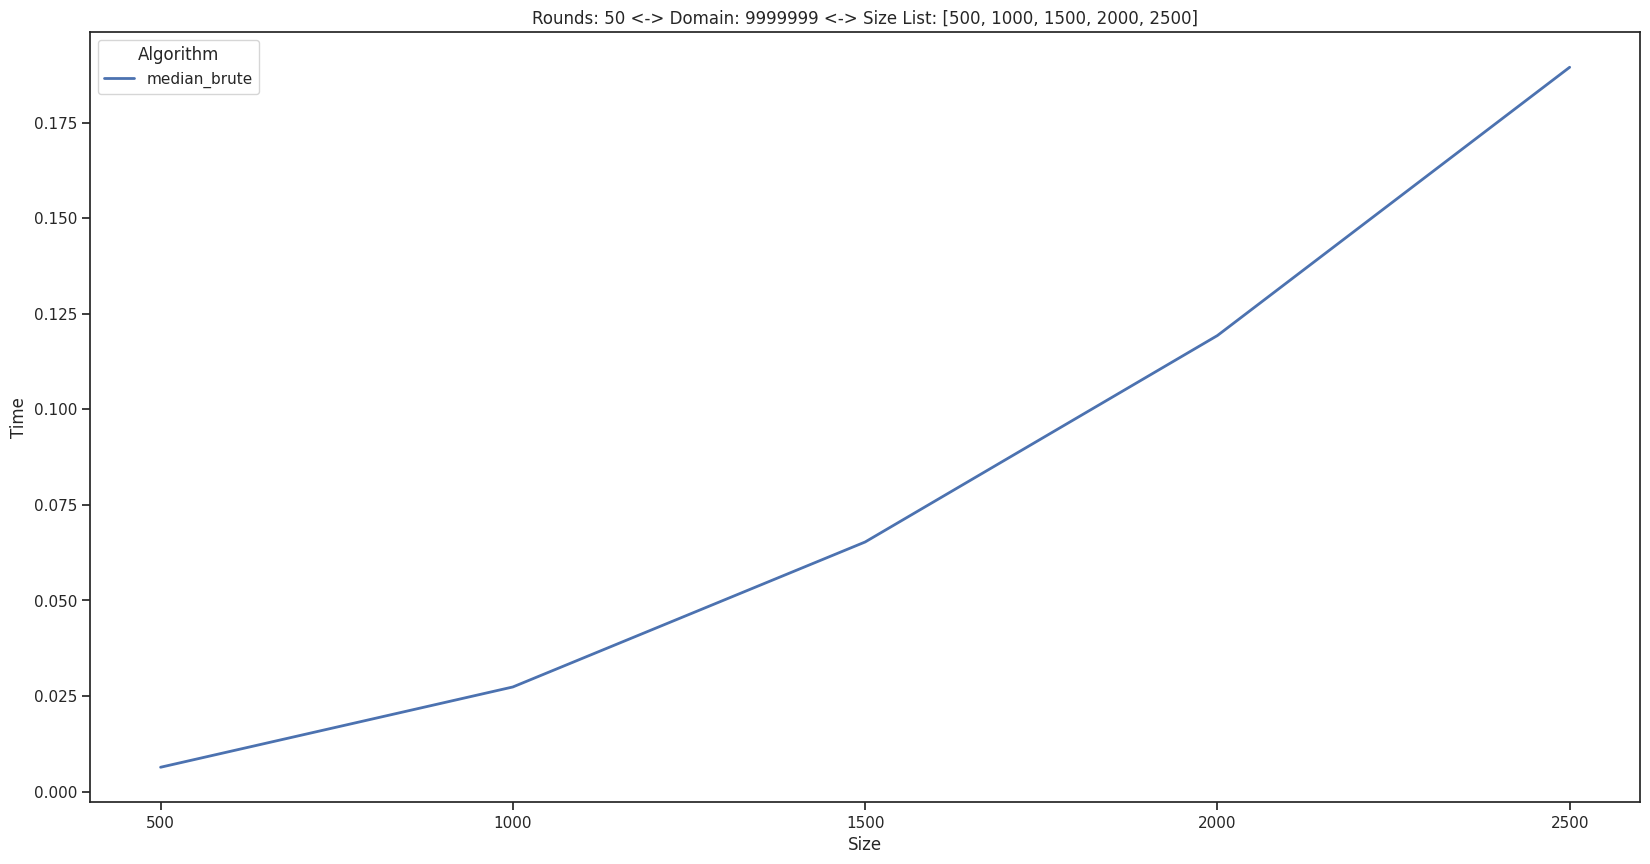

<Figure size 2000x1000 with 0 Axes>

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


# Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

# Defines plot size
plt.rcParams["figure.figsize"] = [20, 10]

chart = sns.lineplot(x="Size", y="Time", hue="Algorithm", data=df)
plt.title(f"Rounds: {num_rounds} <-> Domain: {DOMAIN} <-> Size List: {sizes}")
# plt.yscale('log')
fig = plt.figure()
chart.set(xticks=[i for i in df.Size])
plt.show()